<h1>Pronóstico Concreto utilizando Prophet de Facebook</h1>

In [1]:
# Importación de las librerías
import numpy as np
import pandas as pd
from keras.models import load_model
#import modulo_conn_sql as mcq
import datetime 
from prophet import Prophet
import matplotlib.pyplot as plt

In [69]:
#Parametros
pais = 'Colombia'      
inicioHistoria = datetime.datetime(2014, 1, 1) #'2013-05-01'
dias_pronostico = 30

dataset = pd.read_excel("../datos/" + pais +"/" + pais + ".xlsx")
dataset['Fecha'] = pd.to_datetime(dataset['Fecha'])
dataset = dataset[ dataset['Fecha'] >= inicioHistoria]

df = dataset[['Fecha', 'Vol']]
df.columns = ['ds', 'y']

#Creacion y ajuste del modelo MULTIPLICATIVO
m = Prophet(mcmc_samples=300)
m.add_country_holidays(country_name='COL')
m.fit(df)

#pronostico
future = m.make_future_dataframe(periods=dias_pronostico, freq = 'D')
forecast = m.predict(future)
forecast[['ds', 'yhat','yhat_lower','yhat_upper']].tail(dias_pronostico)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
To run all diagnostics call pystan.check_hmc_diagnostics(fit)


,ds,yhat,yhat_lower,yhat_upper
2213,2021-07-10,3414.791646,2160.474754,4708.828676
2214,2021-07-11,62616.193531,-42482.236117,237946.664937
2215,2021-07-12,4110.616627,2823.016045,5375.725726
2216,2021-07-13,4768.463814,3481.864758,6062.347941
2217,2021-07-14,5074.323482,3757.585556,6420.167095
2218,2021-07-15,5173.175447,3742.689954,6513.722324
2219,2021-07-16,5588.070910,4313.563919,6840.879194
2220,2021-07-17,3526.553241,2122.881390,4806.769253
2221,2021-07-18,62714.922133,-42189.704431,238124.382691
2222,2021-07-19,4193.000257,2794.077463,5482.552839


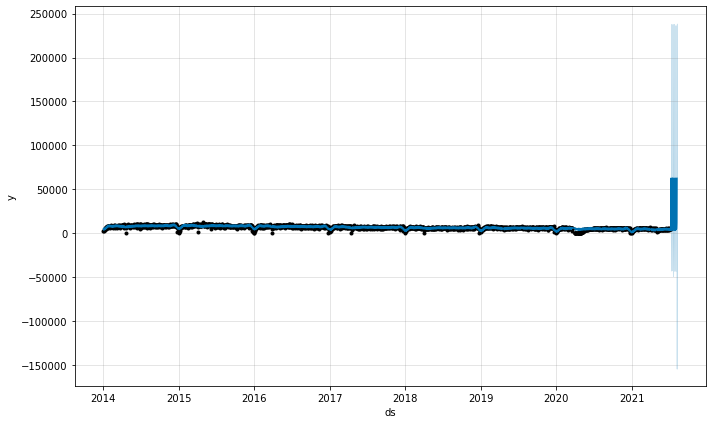

In [70]:
m.plot(forecast);

(array(18687.), array(18841.))

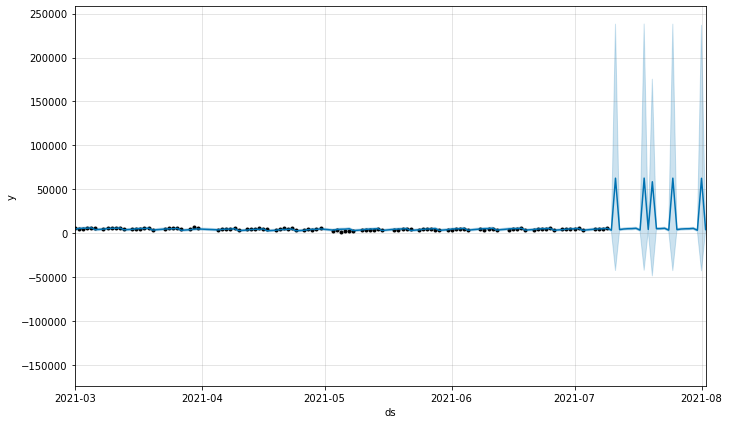

In [72]:
m.plot(forecast);
plt.xlim('2021-03-01', '2021-08-02')

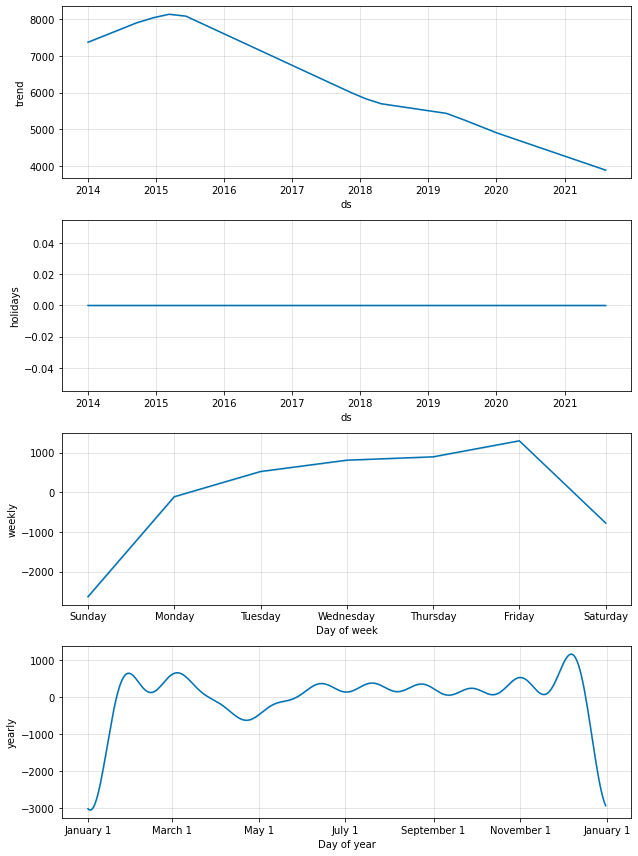

In [64]:
m.plot_components(forecast);

In [55]:
df2

,ds,y,cap,floor
198,2014-01-02,2115.25,12000,0
199,2014-01-03,4079.75,12000,0
200,2014-01-04,2416.25,12000,0
201,2014-01-07,3839.50,12000,0
202,2014-01-08,4708.75,12000,0
...,...,...,...,...
2406,2021-07-03,3841.25,12000,0
2407,2021-07-06,4648.00,12000,0
2408,2021-07-07,4842.50,12000,0
2409,2021-07-08,5203.75,12000,0


In [57]:
#Creacion y ajuste del modelo MULTIPLICATIVO y cota minima
df2 = df.copy()
df2['cap'] = 12000
df2['floor'] = 0
m1 = Prophet(seasonality_mode='multiplicative', growth='logistic')
m1.fit(df2)

#pronostico
future2 = m1.make_future_dataframe(periods=dias_pronostico, freq = 'D')
future2['cap'] = 12000
future2['floor'] = 0
forecast2 = m1.predict(future2)
forecast2[['ds', 'yhat','yhat_lower','yhat_upper']].tail(dias_pronostico)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
2213,2021-07-10,3774.079318,2425.378675,5076.166600
2214,2021-07-11,-2843.948801,-4181.667294,-1630.660966
2215,2021-07-12,4252.562686,2873.123529,5513.798459
2216,2021-07-13,4691.757579,3337.895012,5893.352274
2217,2021-07-14,4893.223255,3520.489640,6231.188297
2218,2021-07-15,4962.992515,3634.316240,6226.929820
2219,2021-07-16,5232.368326,3997.491891,6511.540634
2220,2021-07-17,3852.937190,2586.336417,5148.187790
2221,2021-07-18,-2757.795209,-4020.956892,-1484.450844
2222,2021-07-19,4312.146373,3029.993424,5535.731813


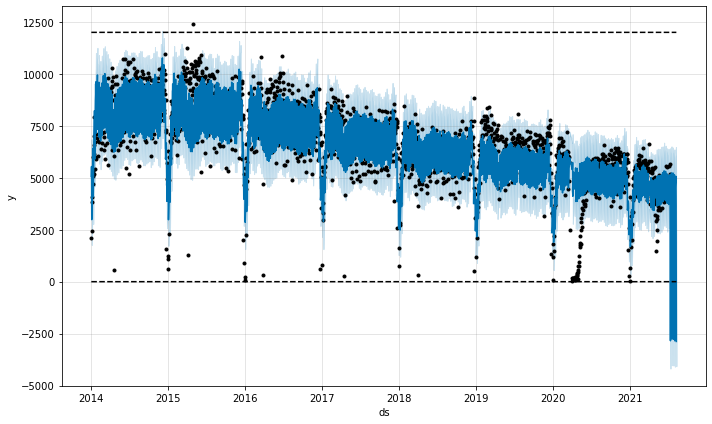

In [58]:
m1.plot(forecast2);

(array(18687.), array(18841.))

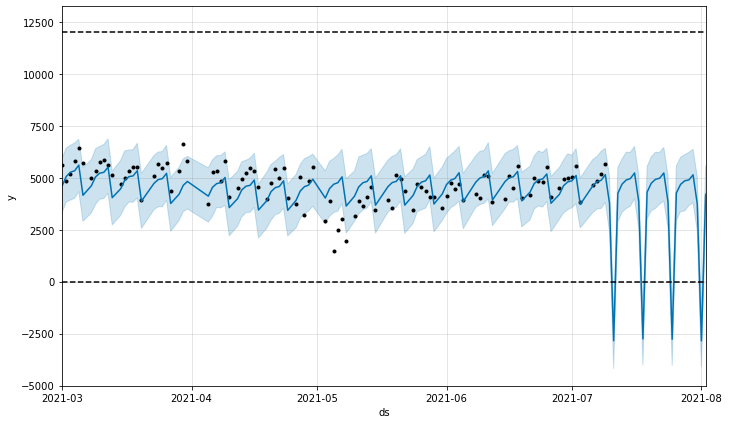

In [59]:
m1.plot(forecast2);
plt.xlim('2021-03-01', '2021-08-02')